In [23]:
import json
import requests
import pickle

In [25]:
response = requests.get('http://raw.communitydragon.org/latest/cdragon/tft/ko_kr.json')
with open('data/set5/ko_kr.json', 'wb') as out_file:
     pickle.dump(response.json(), out_file)
        
response = requests.get('http://raw.communitydragon.org/latest/cdragon/tft/en_us.json')
with open('data/set5/en_us.json', 'wb') as out_file:
     pickle.dump(response.json(), out_file)
del response

In [26]:
ko_kr = None
en_us = None
with open('data/set5/ko_kr.json', 'rb') as in_file:
     ko_kr = pickle.load(in_file)
with open('data/set5/en_us.json', 'rb') as in_file:
     en_us = pickle.load(in_file)

In [27]:
ko_kr

{'items': [{'desc': '<TFTShadowItemBonus>전투 시작 시 다음 효과 획득:</TFTShadowItemBonus><li>공격력 +@BonusAD@ 및 주문력 +@BonusSP@</li> <li>기본 공격과 스킬 사용 시 피해량의 @TraitMultiplier@%만큼 체력 회복</li><br><TFTShadowItemPenalty>위 효과는 처치 관여 후 만료되며 다음 처치 관여 시 다시 획득</TFTShadowItemPenalty>',
   'effects': {'BonusAD': 40.0,
    'CritChance': 15.0,
    'Mana': 15.0,
    '{a60806db}': 66.66699981689453,
    '{ae49cc70}': 40.0,
    '{c0c9af7f}': 40.0},
   'from': [1004, 1009],
   'icon': 'ASSETS/Maps/Particles/TFT/Item_Icons/Shadow/S_Hand_of_Justice.dds',
   'id': 1049,
   'name': '복수의 손길'},
  {'desc': '받는 마법 피해 <TFTShadowItemPenalty>@MagicReduction@%</TFTShadowItemPenalty> 감소. <TFTShadowItemBonus>받는 치명타 공격의 추가 피해 무효화</TFTShadowItemBonus>',
   'effects': {'MagicReduction': 15.0, 'MagicResist': 40.0},
   'from': [1006, 1006],
   'icon': 'ASSETS/Maps/Particles/TFT/Item_Icons/Shadow/S_Dragons_Claw.dds',
   'id': 1066,
   'name': '구부러진 용의 발톱'},
  {'desc': '오오라를 발산해 장착 유닛을 제외한 <TFTShadowItemBonus>전장의 모든 아군</TFTShadowItemBonu

In [38]:
def GetItemById(value_json, id: int):
    return list(filter(lambda x: x['id'] == id, value_json['items']))

def GetEnglishNameById(en_us_json, id: int):
    list_items = GetItemById(en_us_json, id)
    if list_items:
        return list_items[0]['name']
    return 'error: %d' % id

def GetKoreanNameById(ko_kr_json, id: int):
    list_items = GetItemById(ko_kr_json, id)
    if list_items:
        return list_items[0]['name']
    return 'error: %d' % id

GetNameById(ko_kr, 1049)

'복수의 손길'

In [73]:
def GetChampionByApiName(value_json, api_name: str):
    for champions in value_json['setData']:
        for champion in champions['champions']:
            if champion['apiName'] == api_name:
                return champion
    return 'error: %d' % id

def GetEnglishNameById(api_name: str):
    return GetChampionByApiName(ko_kr_json, api_name)

def GetKoreanNameById(api_name: str):
    return GetChampionByApiName(ko_kr_json, api_name)

GetChampionByApiName(ko_kr, 'TFT5_Riven')

{'ability': {'desc': '리븐이 검을 강화해 주변 적들을 @StunDuration@초 동안 기절시키고 @ModifiedMagicDamage@의 마법 피해를 입힙니다. 그리고 @EmpowerDuration@초 동안 @BonusAttackDamagePercent*100@%의 추가 공격력을 얻습니다.',
  'icon': 'ASSETS/Characters/Riven/HUD/Icons2D/RivenBladeoftheExile.dds',
  'name': '빛의 검',
  'variables': [{'name': 'StunDuration',
    'value': [0.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]},
   {'name': 'MagicDamage', 'value': [0.0, 100.0, 200.0, 500.0, 0.0, 0.0, 0.0]},
   {'name': 'EmpowerDuration', 'value': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]},
   {'name': 'BonusAttackDamagePercent',
    'value': [0.0,
     0.800000011920929,
     0.8999999761581421,
     1.0,
     0.0,
     0.0,
     0.0]}]},
 'apiName': 'TFT5_Riven',
 'cost': 3,
 'icon': 'ASSETS/UX/TFT/ChampionSplashes/TFT5_Riven.TFT_Set5.dds',
 'name': '리븐',
 'stats': {'armor': 35.0,
  'attackSpeed': 0.800000011920929,
  'critChance': 0.25,
  'critMultiplier': 1.5,
  'damage': 90.0,
  'hp': 800.0,
  'initialMana': 0,
  'magicResist': 35.0,
  'mana': 40.0,
  'range'

In [70]:
len(ko_kr['setData'])

10

# Make Class

In [50]:
import os
import json
import requests
from IPython.display import Image, display

In [74]:
class TFTDataManager:
    
    def __init__(self):
        self.latest_cdragon_url = 'http://raw.communitydragon.org/latest/'
        self.latest_cdragon_game_url = self.latest_cdragon_url + 'game/'
        self.json_ko_kr = requests.get(self.latest_cdragon_url + 'cdragon/tft/ko_kr.json').json()
        self.json_en_us = requests.get(self.latest_cdragon_url + 'cdragon/tft/en_us.json').json()
    
    #
    # 아이템
    #
    
    def GetItemById(self, value_json, item_id: int):
        return list(filter(lambda x: x['id'] == item_id, value_json['items']))

    def GetKoreanItemNameById(self, item_id: int):
        list_items = self.GetItemById(self.json_ko_kr, item_id)
        if list_items:
            return list_items[0]['name']
        return 'error: %d' % item_id

    def GetEnglishItemNameById(self, item_id: int):
        list_items = self.GetItemById(self.json_en_us, item_id)
        if list_items:
            return list_items[0]['name']
        return 'error: %d' % item_id

    def GetItemIconByItemId(self, id: int):
        list_items = self.GetItemById(self.json_en_us, id)
        if list_items:
            icon_url = list_items[0]['icon']
            response = requests.get((os.path.splitext(self.latest_cdragon_game_url + icon_url)[0]+'.png').lower())
            display(Image(response.content))
        
    #
    # 챔피온
    #
        
    def GetChampionByApiName(self, value_json, api_name: str):
        for champions in value_json['setData']:
            for champion in champions['champions']:
                if champion['apiName'] == api_name:
                    return champion
        return 'error: %d' % id
    
    def GetEnglishChampionNameByApiName(self, api_name: str):
        return self.GetChampionByApiName(self.json_ko_kr, api_name)

    def GetKoreanChampionNameByApiName(self, api_name: str):
        return self.GetChampionByApiName(self.json_en_us, api_name)
    
    def GetChampionIconByApiName(self, api_name: str):
        champion = self.GetChampionByApiName(self.json_en_us, api_name)
        icon_url = champion['icon']
        response = requests.get((os.path.splitext(self.latest_cdragon_game_url + icon_url)[0]+'.png').lower())
        display(Image(response.content))
            

In [75]:
tft_data_manager = TFTDataManager()

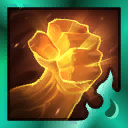

In [77]:
tft_data_manager.GetItemIconByItemId(1049)

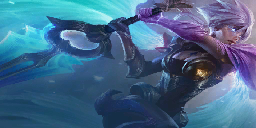

In [78]:
tft_data_manager.GetChampionIconByApiName('TFT5_Riven')